In [6]:
import mpmath
import numpy as np
import matplotlib.pyplot as plt
import time
import math

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# Find the polynomial coefficients for triangle Hofstadter model
# with vector potential Ay=(p/q)*2pi*x and non-Hermitian term delta
# with momentum in y direction ky
def pk(p,q,delta,ky):
    # brute forcely calculate pk for k=1,2,3,4
    A = (mpmath.mpf(1) + delta)/(mpmath.mpf(1) - delta)
    B = (mpmath.mpf(1) - delta)/(mpmath.mpf(1) + delta)
    if q == 1:
        T = 2+A*mpmath.exp(1j*(3*mpmath.pi*(p/q)-ky))+B*mpmath.exp(-1j*(3*mpmath.pi*(p/q)-ky))
        V = mpmath.sqrt(A)*mpmath.exp(-1j*(2*mpmath.pi*(p/q)-ky))+ \
            mpmath.sqrt(B)*mpmath.exp(1j*(2*mpmath.pi*(p/q)-ky))
        poly = [1,-V]
        poly_init = [1,-V]
        return poly,T,poly_init
    elif q == 2:
        Tq = [0] * (q + 1)
        Vq = [0] * (q + 1)
        Vq[1] = mpmath.sqrt(A)*mpmath.exp(-1j*(2*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(2*mpmath.pi*(p/q)-ky))
        Vq[2] = mpmath.sqrt(A)*mpmath.exp(-1j*(4*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(4*mpmath.pi*(p/q)-ky))
        Tq[1] = 2 + A*mpmath.exp(1j*(3*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(3*mpmath.pi*(p/q)-ky))
        Tq[2] = 2 + A*mpmath.exp(1j*(5*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(5*mpmath.pi*(p/q)-ky))
        T = Tq[1]*Tq[2]
        poly = [1,-Vq[1]-Vq[2],-Tq[1]-Tq[2]+Vq[1]*Vq[2]]
        poly_init = [1,-Vq[1]-Vq[2],-Tq[1]+Vq[1]*Vq[2]]
        return poly,T,poly_init
    elif q == 3:
        Tq = [0] * (q + 1)
        Vq = [0] * (q + 1)
        Vq[1] = mpmath.sqrt(A)*mpmath.exp(-1j*(2*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(2*mpmath.pi*(p/q)-ky))
        Vq[2] = mpmath.sqrt(A)*mpmath.exp(-1j*(4*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(4*mpmath.pi*(p/q)-ky))
        Vq[3] = mpmath.sqrt(A)*mpmath.exp(-1j*(6*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(6*mpmath.pi*(p/q)-ky))
        Tq[1] = 2 + A*mpmath.exp(1j*(3*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(3*mpmath.pi*(p/q)-ky))
        Tq[2] = 2 + A*mpmath.exp(1j*(5*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(5*mpmath.pi*(p/q)-ky))
        Tq[3] = 2 + A*mpmath.exp(1j*(7*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(7*mpmath.pi*(p/q)-ky))
        T = Tq[1]*Tq[2]*Tq[3]
        poly = [1,-Vq[1]-Vq[2]-Vq[3],-Tq[1]-Tq[2]-Tq[3]+Vq[1]*Vq[2]+Vq[1]*Vq[3]+Vq[2]*Vq[3],Tq[1]*Vq[3]+Tq[2]*Vq[1]+Tq[3]*Vq[2]]
        poly_init = [1,-Vq[1]-Vq[2]-Vq[3],-Tq[1]-Tq[2]+Vq[1]*Vq[2]+Vq[1]*Vq[3]+Vq[2]*Vq[3],Tq[1]*Vq[3]+Tq[2]*Vq[1]-Vq[1]*Vq[2]*Vq[3]]
        return poly,T,poly_init
    elif q == 4:
        Tq = [0] * (q + 1)
        Vq = [0] * (q + 1)
        Vq[1] = mpmath.sqrt(A)*mpmath.exp(-1j*(2*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(2*mpmath.pi*(p/q)-ky))
        Vq[2] = mpmath.sqrt(A)*mpmath.exp(-1j*(4*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(4*mpmath.pi*(p/q)-ky))
        Vq[3] = mpmath.sqrt(A)*mpmath.exp(-1j*(6*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(6*mpmath.pi*(p/q)-ky))
        Vq[4] = mpmath.sqrt(A)*mpmath.exp(-1j*(8*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(8*mpmath.pi*(p/q)-ky))
        Tq[1] = 2 + A*mpmath.exp(1j*(3*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(3*mpmath.pi*(p/q)-ky))
        Tq[2] = 2 + A*mpmath.exp(1j*(5*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(5*mpmath.pi*(p/q)-ky))
        Tq[3] = 2 + A*mpmath.exp(1j*(7*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(7*mpmath.pi*(p/q)-ky))
        Tq[4] = 2 + A*mpmath.exp(1j*(9*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(9*mpmath.pi*(p/q)-ky))
        T = Tq[1]*Tq[2]*Tq[3]*Tq[4]
        poly = [mpmath.mpc(0)] * (q + 1)
        poly[0] = 1
        poly[1] = -Vq[1]-Vq[2]-Vq[3]-Vq[4]
        poly[2] = -Tq[1]-Tq[2]-Tq[3]-Tq[4]+Vq[1]*Vq[2]+Vq[1]*Vq[3]+Vq[1]*Vq[4]+Vq[2]*Vq[3]+Vq[2]*Vq[4]+Vq[3]*Vq[4]
        poly[3] = Tq[1]*(Vq[3]+Vq[4])+Tq[2]*(Vq[1]+Vq[4])+Tq[3]*(Vq[1]+Vq[2])+Tq[4]*(Vq[2]+Vq[3])-Vq[1]*Vq[2]*Vq[3]-Vq[1]*Vq[2]*Vq[4]-Vq[1]*Vq[3]*Vq[4]-Vq[2]*Vq[3]*Vq[4]
        poly[4] = Vq[1]*Vq[3]*Vq[2]*Vq[4]-Tq[1]*Vq[3]*Vq[4]-Tq[2]*Vq[1]*Vq[4]-Tq[3]*Vq[1]*Vq[2]-Tq[4]*Vq[2]*Vq[3]+Tq[1]*Tq[3]+Tq[2]*Tq[4]
        poly_init = [mpmath.mpc(0)] * (q + 1)
        poly_init[0] = 1
        poly_init[1] = -Vq[1]-Vq[2]-Vq[3]-Vq[4]
        poly_init[2] = -Tq[1]-Tq[2]-Tq[3]+Vq[1]*Vq[2]+Vq[1]*Vq[3]+Vq[2]*Vq[3]+Vq[1]*Vq[4]+Vq[2]*Vq[4]+Vq[3]*Vq[4]
        poly_init[3] = Tq[1]*(Vq[3]+Vq[4])+Tq[2]*(Vq[1]+Vq[4])+Tq[3]*(Vq[1]+Vq[2]) \
                       -Vq[1]*Vq[2]*Vq[3]-Vq[1]*Vq[2]*Vq[4]-Vq[1]*Vq[3]*Vq[4]-Vq[2]*Vq[3]*Vq[4]
        poly_init[4] = Tq[1]*Tq[3]-Tq[1]*Vq[3]*Vq[4]-Tq[2]*Vq[1]*Vq[4]-Tq[3]*Vq[1]*Vq[2]+Vq[1]*Vq[2]*Vq[3]*Vq[4]
        return poly,T,poly_init
    # for k >= 5 (k = q)
    else:
        Tq = [mpmath.mpf(0)] * (q + 1)
        Vq = [mpmath.mpf(0)] * (q + 1)
        for i in range(1,q+1):
            # store V_i and T_i
            Vq[i] = mpmath.sqrt(A)*mpmath.exp(-mpmath.mpc(0,1)*(mpmath.mpf(2)*mpmath.pi*(mpmath.mpf(p) / mpmath.mpf(q))*mpmath.mpf(i)-ky))+ \
                    mpmath.sqrt(B)*mpmath.exp(mpmath.mpc(0,1)*(mpmath.mpf(2)*mpmath.pi*(mpmath.mpf(p) / mpmath.mpf(q))*mpmath.mpf(i)-ky))
            Tq[i] = 2 + A*mpmath.exp(mpmath.mpc(0,1)*(mpmath.mpf(2)*mpmath.pi*(mpmath.mpf(p) / mpmath.mpf(q))*(mpmath.mpf(i)+mpmath.mpf('0.5'))-ky))+ \
                    B*mpmath.exp(-mpmath.mpc(0,1)*(mpmath.mpf(2)*mpmath.pi*(mpmath.mpf(p) / mpmath.mpf(q))*(mpmath.mpf(i)+mpmath.mpf('0.5'))-ky))
        # calculate coefficients of Delta_{1,k}
        Delta1 = mpmath.matrix(q+1,q+1)
        # initial condition Delta_{1,1} and Delta_{1,2}
        Delta1[1,1] = -Vq[1]
        Delta1[2,1] = -Vq[1]-Vq[2]
        Delta1[2,2] = Vq[1]*Vq[2]-Tq[1]
        # recursively calculate coefficients of Delta_{1,i} until i=k
        for i in range(3,q+1):
            Delta1[i,1] = Delta1[i-1,1] - Vq[i]
            Delta1[i,2] = Delta1[i-1,2] - Vq[i]*Delta1[i-1,1] - Tq[i-1]
            for k in range(3,i):
                Delta1[i,k] = Delta1[i-1,k] - Vq[i]*Delta1[i-1,k-1] - Tq[i-1]*Delta1[i-2,k-2]
            Delta1[i,i] = -Vq[i]*Delta1[i-1,i-1] - Tq[i-1]*Delta1[i-2,i-2]
        # calculate coefficients of Delta_{2,k-1}
        Delta2 = mpmath.matrix(q+1,q+1)
        # initial condition Delta_{2,2} and Delta_{2,3}
        Delta2[2,1] = -Vq[2]
        Delta2[3,1] = -Vq[2]-Vq[3]
        Delta2[3,2] = Vq[2]*Vq[3]-Tq[2]
        # recursively calculate coefficients of Delta_{2,i} until i=k-1
        for i in range(4,q):
            Delta2[i,1] = Delta2[i-1,1] - Vq[i]
            Delta2[i,2] = Delta2[i-1,2] - Vq[i]*Delta2[i-1,1] - Tq[i-1]
            for k in range(3,i-1):
                Delta2[i,k] = Delta2[i-1,k] - Vq[i]*Delta2[i-1,k-1] - Tq[i-1]*Delta2[i-2,k-2]
            Delta2[i,i-1] = -Vq[i]*Delta2[i-1,i-2] - Tq[i-1]*Delta2[i-2,i-3]
        # T=T1*T2*...*Tq
        T = 1
        for i in range(1,q+1):
            T = T*Tq[i]
        # poly1 = Delta_{1,q}
        poly1 = [1] + list(Delta1[q,1:])
        # poly2 = -Tq*Delta_{2,q-1}
        poly2 = [0,0] + [-Tq[q]] + [x * (-Tq[q]) for x in list(Delta2[q-1,1:q-1])]
        # pk = Delta_{1,q} - Tq*Delta_{2,q-1}
        poly = [x + y for x,y in zip(poly1,poly2)]
        # return pk,T,Dk=Delta_{1,q}
        return poly,T,poly1
    
# multiply of two polynomials with degree q
def polymul(poly1,poly2,q):
    poly = [mpmath.mpf(0)] * (2 * q + 1)
    for i in range(0, q + 1):
        for j in range(0, q + 1):
            poly[i + j] += poly1[i] * poly2[j]
    return poly

# use fraction with lower q to approxiamte i/50. i,e, 19/100->4/21
def find_nearest_fraction(x, max_denominator=50):
    min_diff = float('inf')
    best_fraction = None
    
    for q in range(1, max_denominator + 1):
        p = round(x * q)
        diff = abs(x - p / q)
        if diff < min_diff:
            min_diff = diff
            best_fraction = (p, q)
    
    return best_fraction

# generate theta list from [0,2pi] such that cos(theta)=p/q
def find_theta_list(phi_modulus,Q=100):
    theta_list = [0] * 4 * Q
    pq_list = [0] * 4 * Q
    index = 0
    for i in range(Q):
        if i == 1 or i == 99:
            pq_fraction = 1-i/Q
            p = Q - i
            q = Q
        else:
            p,q = find_nearest_fraction(1-i/Q)
            pq_fraction = p/q
        if mpmath.pi*pq_fraction/phi_modulus <= 1:
            theta = mpmath.acos(mpmath.pi*pq_fraction/phi_modulus)
            theta_list[index] = theta
            pq_list[index] = (p,q)
            theta_list[index + 1] = mpmath.pi - theta
            pq_list[index + 1] = (-p,q)
            theta_list[index + 2] = theta + mpmath.pi
            pq_list[index + 2] = (-p,q)
            theta_list[index + 3] = 2*mpmath.pi - theta
            pq_list[index + 3] = (p,q)
            index += 4
    theta_list = theta_list[0:index]
    pq_list = pq_list[0:index]
    return theta_list,pq_list


# compute nH_Hofstadter_butterfly from fixed phi modulus pi
# return list theta ,real spectrum and imaginary spectrum
def nH_Hofstadter_theta(ky,phi_modulus,Q=100,N=200,dps=50):
    start_time = time.time()
    mpmath.mp.dps = dps # set the precision dps=80
    theta_array = [0] * int(8 * N * Q) # store theta
    real_spectrum_array = [0] * int(8 * N * Q)
    imag_spectrum_array = [0] * int(8 * N * Q)

    eigct = 0 # number of eigvals
    
    theta_list,pq_list = find_theta_list(phi_modulus,Q)
    
    for i in range(len(theta_list)):
        start_time_i = time.time()
        print(f'iteration:{i}',end=' ')
        theta = theta_list[i]
        p,q = pq_list[i]    
        delta = mpmath.tanh(-phi_modulus*mpmath.sin(theta)/3)
        poly,T,poly_init = pk(p,q,delta,ky) # solve pk,T,Dk
        if q > 30:
            nn = 1
        else:
            nn = int(round(N / q)) # number of theta choices
        t = 2*mpmath.sqrt(T) # t = 2sqrt(T)
        poly_temp = poly[:] # 不能使用poly_temp = poly，这样poly_temp和poly指向同一个对象，修改poly_temp会同时修改poly
        for j in range(0,nn):
            chebyshev_root = mpmath.cos((2 * j + 1) * mpmath.pi / (2 * nn))
            poly_temp[q] = poly[q] - t*chebyshev_root
            # solve pk(E)=2sqrt(T)sin(theta) for sin(theta) = chebyshev_root
            roots = mpmath.polyroots(poly_temp,maxsteps=1000,extraprec=200)
            # store the real part and imaginary part of spectrum
            roots_real = [x.real for x in roots]
            roots_imag = [x.imag for x in roots]
            theta_array[eigct: eigct+q+1] = [theta] * q
            real_spectrum_array[eigct: eigct+q+1] = roots_real
            imag_spectrum_array[eigct: eigct+q+1] = roots_imag
            eigct = eigct + q
        # edge OBC spectrum if phi not zero and q not so large
        if p/q != 0 and p/q != 1 and p/q != -1 and q < 30:
            mpmath.mp.dps = 80 # raise the precision since polynomial degree is higher
            Dk_square = polymul(poly_init,poly_init,q) # Dk*Dk
            Dkpk = polymul(poly_init,poly,q) # Dk*pk
            poly_edge = [x - y for x,y in zip(Dk_square,Dkpk)] # Dk*Dk-Dk*pk
            # drop the terms with zero coefficients
            index = 0
            while mpmath.fabs(poly_edge[index]) < 0.000001:
                index = index + 1
            poly_edge = poly_edge[index:]
            # poly_edge = Dk*Dk-Dk*pk+T
            poly_edge[-1] = poly_edge[-1] + T
            # solve Dk*Dk-Dk*pk+T=0
            roots_edge = mpmath.polyroots(poly_edge,maxsteps=1000,extraprec=300)
            # Check whether roots of Dk*Dk-Dk*pk+T satisfy the following condition:
            # Dk=x_+(E), |x_+(E)|<|x_-(E)| or Dk=x_-(E), |x_-(E)|<|x_+(E)|
            # where x_\pm(E)=(pk(E)^2\pm\sqrt(pk(E)^2-4*T))
            for root in roots_edge:
                pk_root_value = mpmath.polyval(poly,root) # pk(E)
                Dk_root_value = mpmath.polyval(poly_init,root) # Dk(E)
                # x_+(E)
                x1 = mpmath.mpf('0.5')*(pk_root_value + mpmath.sqrt(pk_root_value**2 - mpmath.mpf(4)*T))
                # x_-(E)
                x2 = pk_root_value - x1
                # if Dk(E)=x_+(E) and |x_+(E)|<|x_-(E)|
                if mpmath.fabs(Dk_root_value - x1) < 0.0001 and mpmath.fabs(x1) < mpmath.fabs(x2):
                    theta_array[eigct] = theta
                    real_spectrum_array[eigct] = root.real
                    imag_spectrum_array[eigct] = root.imag
                    eigct = eigct + 1
                # if Dk(E)=x_-(E) and |x_-(E)|<|x_+(E)|
                elif mpmath.fabs(Dk_root_value - x2) < 0.0001 and mpmath.fabs(x2) < mpmath.fabs(x1):
                    theta_array[eigct] = theta
                    real_spectrum_array[eigct] = root.real
                    imag_spectrum_array[eigct] = root.imag
                    eigct = eigct + 1
                    
        end_time_i = time.time()
        print(f"time consuming: {end_time_i-start_time_i}")
            
    
    theta_array = theta_array[0:eigct]
    real_spectrum_array = real_spectrum_array[0:eigct]
    imag_spectrum_array = imag_spectrum_array[0:eigct]
    end_time = time.time()
    print(f"total time consuming: {end_time - start_time}")
    return theta_array,real_spectrum_array,imag_spectrum_array

In [7]:
theta_array,real_spectrum_array,imag_spectrum_array=nH_Hofstadter_theta(ky=mpmath.mpf('0')*mpmath.pi,phi_modulus=mpmath.mpf(3))

iteration:0 time consuming: 5.433762550354004
iteration:1 time consuming: 5.876945972442627
iteration:2 time consuming: 5.664931058883667
iteration:3 time consuming: 5.862219333648682
iteration:4 time consuming: 5.683462381362915
iteration:5 time consuming: 5.580575466156006
iteration:6 time consuming: 5.64551568031311
iteration:7 time consuming: 5.555186033248901
iteration:8 time consuming: 3.6921262741088867
iteration:9 time consuming: 3.6527819633483887
iteration:10 time consuming: 3.6623926162719727
iteration:11 time consuming: 3.6809916496276855
iteration:12 time consuming: 11.670935153961182
iteration:13 time consuming: 11.447367429733276
iteration:14 time consuming: 11.71100115776062
iteration:15 time consuming: 11.396348476409912
iteration:16 time consuming: 1.713226318359375
iteration:17 time consuming: 1.7042896747589111
iteration:18 time consuming: 1.7058475017547607
iteration:19 time consuming: 1.6905152797698975
iteration:20 time consuming: 1.3277864456176758
iteration:21 

iteration:172 time consuming: 8.342039585113525
iteration:173 time consuming: 8.118671178817749
iteration:174 time consuming: 8.388306379318237
iteration:175 time consuming: 8.171568393707275
iteration:176 time consuming: 3.896221876144409
iteration:177 time consuming: 3.9081625938415527
iteration:178 time consuming: 3.8963048458099365
iteration:179 time consuming: 3.8904550075531006
iteration:180 time consuming: 0.14203095436096191
iteration:181 time consuming: 0.14299941062927246
iteration:182 time consuming: 0.14257264137268066
iteration:183 time consuming: 0.14200210571289062
iteration:184 time consuming: 3.8241281509399414
iteration:185 time consuming: 3.836073637008667
iteration:186 time consuming: 3.8518729209899902
iteration:187 time consuming: 3.8266730308532715
iteration:188 time consuming: 8.343639373779297
iteration:189 time consuming: 8.213569164276123
iteration:190 time consuming: 8.34082818031311
iteration:191 time consuming: 8.254053354263306
iteration:192 time consumin

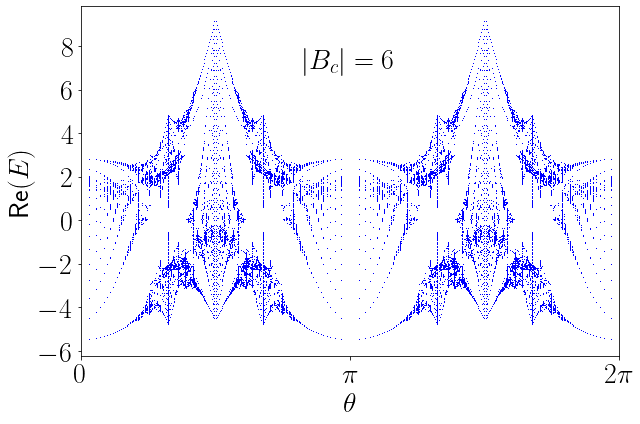

In [23]:
plt.figure(figsize=(9, 6))

plt.plot(theta_array, real_spectrum_array, 'b,', markersize=1)
plt.ylabel(r'$\text{Re}(E)$',fontsize=28)
plt.xlabel(r'$\theta$',fontsize=28)
plt.text(2.6,7,r'$|B_c|=6$',fontsize=28)
plt.xticks([0,np.pi,2*np.pi],['$0$','$\pi$','$2\pi$'],fontsize=28)
plt.yticks(fontsize=28)
plt.xlim([0,2*np.pi])
plt.tight_layout()# adjust the fig to avoid cut off in ylabel

#plt.savefig('nH_Hofstadter_Q_100_ky_0_modulus_3_real.pdf')

plt.show()

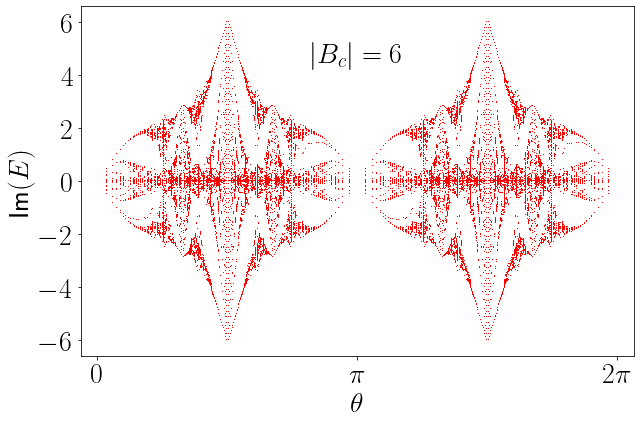

In [24]:
plt.figure(figsize=(9, 6))

plt.plot(theta_array, imag_spectrum_array, 'r,', markersize=1)
#plt.ylim(-1.1,1.1) # if delta=0
plt.ylabel(r'$\text{Im}(E)$',fontsize=28)
plt.xlabel(r'$\theta$',fontsize=28)
plt.text(2.6,4.5,r'$|B_c|=6$',fontsize=28)
plt.xticks([0,np.pi,2*np.pi],['$0$','$\pi$','$2\pi$'],fontsize=28)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
#plt.yticks([-1,-0.5,0,0.5,1],fontsize=20)
plt.tight_layout()# adjust the fig to avoid cut off in ylabel

#plt.savefig('nH_Hofstadter_Q_100_ky_0_modulus_3_imag.pdf')

plt.show()